# Analyse des Ventes de Jeux Vidéos de Nintendo

- **Description du projet :**

> Ce projet consiste à comprendre les ventes des jeux vidéos tout en estimant les ventes totales des différents jeux.
>
> L'objectif métier de ce projet est de développer des applications métier pour aider l'entreprise à estimer les ventes de jeux vidéo

Il s'agit de voir les jeux vidéos les mieux vendus, les caractéristiques associées et tout ce qui peut entrer en jeu

![](https://cdn-uploads.gameblog.fr/img/news/475001_651d7268296f2.jpg)

***Il s'agira dans cette partie d'exploration de données, de se mettre à l'aise avec le `DataSet`, comprendre au maiximum les différentes variables, tirer des conclusions nécessaires afin de définir une stratégie de modélisation qui permettra d'atteindre l'objectif fixé.***

*Donc, il s'agit de ce qu'il faut faire avec les données pour atteindre l'objectif fixé.*

## Table de matières
<ol>
    <li><a href="#def">Définition du problème</a></li>
    <li><a href="#import_data">Importation et acquisition de données</a>
        <ol>
            <li><a href="#import">Importation des librairies</a></li>
            <li><a href="#get">Chargement de données</a></li>
        </ol>
    </li>
    <li><a href="#a1">Analyse de la forme</a>
        <ol>
            <li><a href="#data_type">Différents types de variables</a></li>
            <li><a href="#doublon">Contrôle des doublons</a></li>
            <li><a href="#na_val">Identification de valeurs manquantes</a></li>
            <li><a href="#outlier">Identification des valeurs aberrantes</a></li>
            <li><a href="#stat">Agrégats et Statistiques classiques</a></li>
            <li><a href="#data_manage">Gestion de données</a></li>
                <ol>
                    <li><a href="#na_prepro"> Traitement des valeurs manquantes</a></li>
                    <li><a href="#outlier_prepro">Traitement de valeurs aberrantes</a></li>
                </ol>
        </ol>
    </li>
    <li><a href="#a2">Analyse de fond</a></li>
        <ol>
            <li><a href="#a3">Analyse Univariée</a></li>
            <li><a href="#a4">Analyse Bivariée</a></li>
                <ol>
                    <li><a href="#num_target">Relation variables numériques et target</a></li>
                    <li><a href="#cat_target">Relation variables catégorielles et target</a></li>
                    <li><a href="#features">Relation entre les variables explicatives</a></li>
                </ol>
        </ol>
    <li><a href="#end">Conclusion</a></li>
</ol>

<a id="def"></a>
## 1. Définition du problème

- L'objectif est d *`estimer` les ventes totales d'un jeu vidéo à l'aide d'informations descriptives telles que le pays d'origine, le studio de développement, l'éditeur, la description du jeu, la plateforme de sortie, et le genre et d'évaluer la performance du `modèle`.*

- Nous avons à notre disposition le jeu de données des ventes sur différents jeux vidéos.

- Nous partirons de rien et essayerons de construire progressivement une solution atteignant une très bonne performance.

- Il s'agit bien d'un problème de *`Machine Learning Supervisé`* et plus précisement d'une tâche de *`Régression Linéaire`* dont l'objectif est de prédire une variable `quantitative continue` : *`Global_Sales`*.*

- Le `modèle` sera évalué en utilisant la métrique de *`MSE - Mean Squared Error`* qui mesure la moyenne des carrés des écarts entre les valeurs prédites et les valeurs réelles, *`MAE - Mean Absolute Error`* qui mesure la moyenne des valeurs absolues des écarts entre les valeurs prédites et les valeurs réelles, le *`RMSE - Root Mean Squared Error`* qui est la racine carrée du *`MSE`*. Il donne une mesure de l'écart moyen entre les valeurs prédites et les valeurs réelles, mais nous utiliserons également une autre métrique comme le *`R² - R-squared`* mesure la proportion de la variance totale de la variable dépendante expliquée par le modèle pour évaluer le modèle afin comparer leurs performances.

<a id="import_data"></a>
## 2. Importation des packages nécessaires et acquisition de données

***Dans cette partie nous allons importer les `librairies` qui nous serviront tout au long de notre analyse pour ensuite charger les données sur lesquelles porteront nos analyses***

<a id="import"></a>
## 2.1 Importation de librairies

In [1]:
# Importer les librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud
import plotly.express as px

%matplotlib inline

<a id="get"></a>
## 2.2 Chargement des données

In [2]:
# Importer les données
vgsales_df = pd.read_csv("vgsales.csv")

# Afficher la taille des données
print(f"La base fait {vgsales_df.shape[0]} lignes et {vgsales_df.shape[1]} colonnes\n")

# Afficher les 5 premières lignes des données
vgsales_df.head()

La base fait 16598 lignes et 11 colonnes



Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

<a id="a1"></a>
## 3. Analyse de la forme (contrôle et gestion de données)

Cette analyse permet l'identification de la target ainsi que sa distribution, de savoir les types de nos variables, de contrôler la présence ou non des doublons, d'identifier les valeurs manquantes, de voir les valeurs aberrantes potentielles, de déterminer les statistiques de base dites classiques.

<a id="data_type"></a>
## 3.1 Différents Type de variables et nombre de valeurs uniques par colonne

In [3]:
# Afficher les informations sur les données
vgsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
# Le nombre de valeurs uniques pour chaque colonne
vgsales_df.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

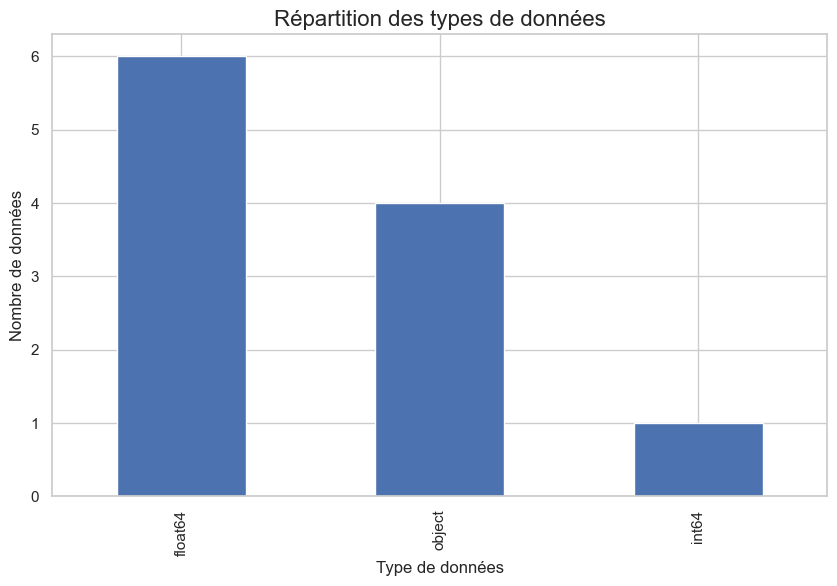

In [5]:
# Définir le style de feuille de calcul à utiliser
sns.set(style="whitegrid")
# Visualiser les types de variables
vgsales_df.dtypes.value_counts().plot(kind="bar", figsize=(10, 6))
# Titrer la figure
plt.title("Répartition des types de données", fontsize=16)
# Labéliser l'axe des x
plt.xlabel("Type de données")
# Labéliser l'axe des y
plt.ylabel("Nombre de données");

<a id="doublon"></a>
## 3.2 Contrôles des doublons

In [6]:
# Valeurs en double
print(f"Il y a au total {vgsales_df.duplicated().sum()} valeurs doubles dans le Dataset")

Il y a au total 0 valeurs doubles dans le Dataset


<a id="na_val"></a>
## 3.3 Identification des valeurs manquantes

In [7]:
# Combien de valeurs manquantes dans les données
print(f"Nous avons au total : {sum(vgsales_df.isna().sum())} valeurs manquantes")
# Afficher le pourcentage qu'occupe les valeurs manquantes
print(f"Soit un total de {round(sum(vgsales_df.isna().sum())/len(vgsales_df)*100, 2)}%")

Nous avons au total : 329 valeurs manquantes
Soit un total de 1.98%


<a id="outlier"></a>
## 3.4 Identification des `outliers` potentiels (valeurs aberrantes)

In [8]:
# Définir la fontion pour détecter les outliers dans un DataFrame
def detect_possible_outliers(df, feature):
    """
    Permet de détecter les outliers dans une colonne numérique d'un DataFrame 
    en utilisant la méthode de l'écart interquartile (IQR).
    
    Inputs :
    --------
    - df : DataFrame
    - feature : Nom de la colonne numérique (str)
    
    Outputs :
    ---------
    Renvoyer la liste des index des possibles outliers 
    ainsi que les limites basse et haute
    
    """
    
    # Calcul du 1er Quartile 
    Q1 = np.nanpercentile(df[feature], 25)
    
    # Calcul du 3ème Quartile 
    Q3 = np.nanpercentile(df[feature], 75)
    
    # Calcul de l'Inter-Quartile Range (IQR)
    IQR = Q3 - Q1
    
    # Calcul des limites, basse & haute
    outer_fence = IQR * 1.5
    lower_limit = Q1 - outer_fence
    upper_limit = Q3 + outer_fence

    # Détecter des outliers potentiels  
    mask = (df[feature] < lower_limit) | (df[feature] > upper_limit)
    
    # Stocker leurs indices
    possible_outlier_index = df[mask].index
    
    # Faire passer sous forme de liste
    outliers_index = possible_outlier_index.tolist()
    
    return sorted(outliers_index), lower_limit, upper_limit

- **Appel à la fonction pour détecter les outliers potentiels**

In [9]:
# Créer une liste des colonnes numériques
num_cols = vgsales_df.select_dtypes(include=np.number).columns.tolist()

# Boucler sur toutes les colonnes numériques
for col in num_cols:

    # Procéder à la détection des outliers potentiels
    outliers_index, lower_limit, upper_limit = detect_possible_outliers(vgsales_df,col)
    
    # Afficher le nombre des outliers potentiels de chaque colonne
    print(f"{col :-<35} {len(outliers_index)} valeurs aberrantes potentielles")

Rank------------------------------- 0 valeurs aberrantes potentielles
Year------------------------------- 305 valeurs aberrantes potentielles
NA_Sales--------------------------- 1681 valeurs aberrantes potentielles
EU_Sales--------------------------- 2081 valeurs aberrantes potentielles
JP_Sales--------------------------- 2425 valeurs aberrantes potentielles
Other_Sales------------------------ 1665 valeurs aberrantes potentielles
Global_Sales----------------------- 1893 valeurs aberrantes potentielles


<a id="stat"></a>
## 3.5 Détermination des agrégats et statistiques classiques

In [10]:
# Stats de base des variables numériques
vgsales_df.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

<a id="data_manage"></a>
## 3.6 Gestion de la qualité des données

Dans cette partie il s'agit de gérer les valeurs manquantes et les valeurs aberrantes potentielles. Après cette analyse de forme, nous avons remarquez qu'il n'y avait pas de valeurs manquantes nous allons donc juste supprimer les valeurs aberrantes potentielles `otuliers`.

<a id="na_prepro"></a>
## 3.6.1 Traitement des valeurs manquantes

In [11]:
# Traiter les valeurs manquantes des variables numériques
mediane = vgsales_df.Year.median()

# Afficher la mediane des années
print(f"La médiane en terme d'années vaut : {mediane}")

La médiane en terme d'années vaut : 2007.0


In [12]:
# Imputation (Remplacement) des valeurs manquantes numériques
vgsales_df.Year.fillna(mediane, inplace=True)

In [13]:
# IL est n'est pas judicieux de remplacer toutes les valeurs manquaantes de la colonne Publisher en Electronic Arts
# Pour ça, il va falloir passer par une autre méthode qui est celle de remplacer par l'occurrence 'Missing'

# Identifier d'abord les colonnes catégorielles
categorical_features = vgsales_df.select_dtypes(include="O").columns.tolist()

# Boucler pour remplacer (imputer de manière automatique)
for feature in categorical_features:
    
    # Imputation par Missing
    vgsales_df[feature].fillna("Missing", inplace=True)

In [14]:
# Vérifier les modifications apportées
vgsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<a id="outlier_prepro"></a>
## 3.6.2 Traitement des valeurs aberrantes `outliers`

In [15]:
# Définir la fonction de suppression de valeurs aberrantes
def remove_outliers(df, column_name):

    """
    Cette foncion permet de supprimer les valeurs aberrantes potentilles se trouvant
    dans un DataFrame et de renvoyer un nouveau DataFrame sans valeurs aberrantes

    Inputs:

    df         : Le DataFrame avec sur lequel on souaite supprimer les valeurs aberrantes
    column_name: Le nom de la colonne qu'il faut vérifier les lignes des outliers potentiels

    Returns:

    Renvoyer le DatFrame (df) qui ne contient aucune valeur aberrante

    """

    # Calculer le 1er et le 3ème quartiles
    Q1, Q3 = df[column_name].quantile([0.25, 0.75])
    # Calculer l'écart interquartile (IQR)
    IQR = Q3 - Q1

    # Calculer les limites inférieures et supérieures
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    # Supprimer les lignes qui contiennent les outliers potentiels
    # Des lignes se situant entre les limites inférieures et supérieures
    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    # Renvoyer le DataFrame sans valeurs aberrantes
    return df

In [16]:
# Réafficher la taille des données avant suppression des outliers
print(f"La base fait {vgsales_df.shape[0]} lignes et {vgsales_df.shape[1]} colonnes\n")

La base fait 16598 lignes et 11 colonnes



- **Division des données en `matrice` (variables explicatives) et `vecteur` (target)**

In [17]:
# Créer la matrice explicative
X = vgsales_df.drop(columns=["Global_Sales"])
# Créer le vecteur target
y = vgsales_df["Global_Sales"]

# Créer la liste des variables numériques et catégorielles
num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(exclude=np.number).columns.tolist()

- **Appel à la fonction de traitement des valeurs aberranres potentielles dites outliers**

In [18]:
# Parcourir toutes les colonnes numériques et supprimer les outliers
for col in num_cols:
    
    # Supprimer les valeurs aberrantes potienles
    X = remove_outliers(X, col)

- **Vérification des modification apportées aux données**

In [19]:
# Afficher de nouveau la taille des données
print(f"La base fait {X.shape[0]} lignes et {X.shape[1]} colonnes\n")

# Afficher de nouveau les statistiques de base
X.describe()

La base fait 10618 lignes et 10 colonnes



Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  10618.000000  10618.000000  10618.000000  10618.000000  10618.000000   
mean   10767.729893   2007.113487      0.088364      0.030998      0.007720   
std     3675.660117      4.700869      0.106195      0.040803      0.016647   
min     2763.000000   1993.000000      0.000000      0.000000      0.000000   
25%     7734.250000   2004.000000      0.000000      0.000000      0.000000   
50%    11133.500000   2008.000000      0.050000      0.010000      0.000000   
75%    13939.750000   2010.000000      0.130000      0.050000      0.000000   
max    16600.000000   2020.000000      0.570000      0.170000      0.070000   

        Other_Sales  
count  10618.000000  
mean       0.009650  
std        0.012283  
min        0.000000  
25%        0.000000  
50%        0.010000  
75%        0.010000  
max        0.050000

In [20]:
# Boucler sur toutes les colonnes numériques
for col in num_cols:

    # Procéder à la détection des outliers potentiels
    outliers_index, lower_limit, upper_limit = detect_possible_outliers(vgsales_df,col)
    # Afficher le nombre des outliers potentiels de chaque colonne
    print(f"{col :-<35} {len(outliers_index)} valeurs aberrantes potentielles")

Rank------------------------------- 0 valeurs aberrantes potentielles
Year------------------------------- 305 valeurs aberrantes potentielles
NA_Sales--------------------------- 1681 valeurs aberrantes potentielles
EU_Sales--------------------------- 2081 valeurs aberrantes potentielles
JP_Sales--------------------------- 2425 valeurs aberrantes potentielles
Other_Sales------------------------ 1665 valeurs aberrantes potentielles


In [21]:
# Changer le type de données de la colonne Year en type int64
X.Year = X.Year.astype(np.int64)

In [22]:
# Vérifier les modifications apportées
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10618 entries, 2761 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         10618 non-null  int64  
 1   Name         10618 non-null  object 
 2   Platform     10618 non-null  object 
 3   Year         10618 non-null  int64  
 4   Genre        10618 non-null  object 
 5   Publisher    10618 non-null  object 
 6   NA_Sales     10618 non-null  float64
 7   EU_Sales     10618 non-null  float64
 8   JP_Sales     10618 non-null  float64
 9   Other_Sales  10618 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 912.5+ KB


<a id="a2"></a>
## 4. Analyse de fond des données

Il s'agit ici de comprendre les différentes variables, de visualiser la relation entre ces variables, notamment les relations `feature - target` (variables explicative et la cible)

<a id="a3"></a>
## 4.1 Analyse Univariée

In [23]:
# Vérification de la taille de la matrice et les observations du vecteur
print(f"La matrice a une taille de {X.shape} et le vecteur a {y.shape} observations")

La matrice a une taille de (10618, 10) et le vecteur a (16598,) observations


- **Les fonctions pour tracer les différents graphiques**

In [24]:
# La fonction pour tracer des histogrammes des variables numéiriques continues
def plot_hist(df, column_name, **kwargs):
    """Cette fonction permet de tracer les histogrammes en fournissant
       le DataFrame, la colonne sur laquelle on trace cette histogramme 
       et le nombre de cases qu'il faut prendre en compte

    Args:
        df (DataFrame): C'est le DataFrame qu'il faut donner en entrée
        column_name (string): La colonne sur laquelle on trace l'histogramme
        bins_edge (int): La taille de case de l'histogramme
    """

    # Traçage
    plt.hist(x=column_name, data=df, **kwargs)

# La fonction pour tracer les histogrammes des variables catégoirielles discrètes
def plot_bar(df, column, **kwargs):
    """_summary_

    Args:
        df (_type_): _description_
        column (_type_): _description_
    """
    # Tracer le graphique
    sns.countplot(x=column, data=df, **kwargs)

# La fonction pour tracer les distributions des différentes variables
def plot_distribution(df, column_name):
    """Cette fonction permet de tracer les distribution sans KDE

    Args:
        df (DatFrame): L'ensemble de données à fournir dans lequel
                       se trouve les colonnes nécessaires
        column_name (string): La colonne sur laquelle on trace la distribution
    """
    # Tracer la distribution displot
    sns.histplot(df[column_name], kde=True)
    
# La fonction de correlation entre deux varibles
def correlation(df, ft_1, ft_2):
    
    df.plot(x=ft_1, y=ft_2, kind="scatter",figsize=(10,8))

# La fonction pour définir l'espace de travail
def space_fig(width, height):

    # Renvoyer les tailles données
    return plt.figure(figsize=(width, height))

# La fonction pour la desription des graphiques
def describe_graph(title="", x_label="", y_label=""):

    # Déscripion du graphique
    plt.title(title, fontsize=18)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

In [25]:
# Réafficher les 5 premières lignes de la matrice X
X.head()

Rank                              Name Platform  Year      Genre  \
2761  2763      The Walking Dead: Season One     X360  2012  Adventure   
2799  2801                   Mortal Kombat 4      N64  1998   Fighting   
2805  2807         Oddworld: Munch's Oddysee       XB  2001   Platform   
2813  2815             Full Spectrum Warrior       XB  2004   Strategy   
2823  2825  James Bond 007: Agent Under Fire       GC  2002    Shooter   

               Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  
2761  Avanquest Software      0.55      0.14       0.0         0.05  
2799      GT Interactive      0.55      0.17       0.0         0.01  
2805               Atari      0.54      0.16       0.0         0.03  
2813                 THQ      0.54      0.16       0.0         0.03  
2823     Electronic Arts      0.56      0.15       0.0         0.02

In [26]:
# Rédéfinir les index de toutes le variables de ventes
zone_sales = vgsales_df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum().reset_index()
# Rédéfinir les colonnes
zone_sales.columns = ["Zone", "Sales"]

# La répartition des ventes de jeux par zone
fig = px.pie(zone_sales, values="Sales", 
             names="Zone", title="Répartition des Ventes par Zone Géographique")
# Afficher le graphique
fig.show()

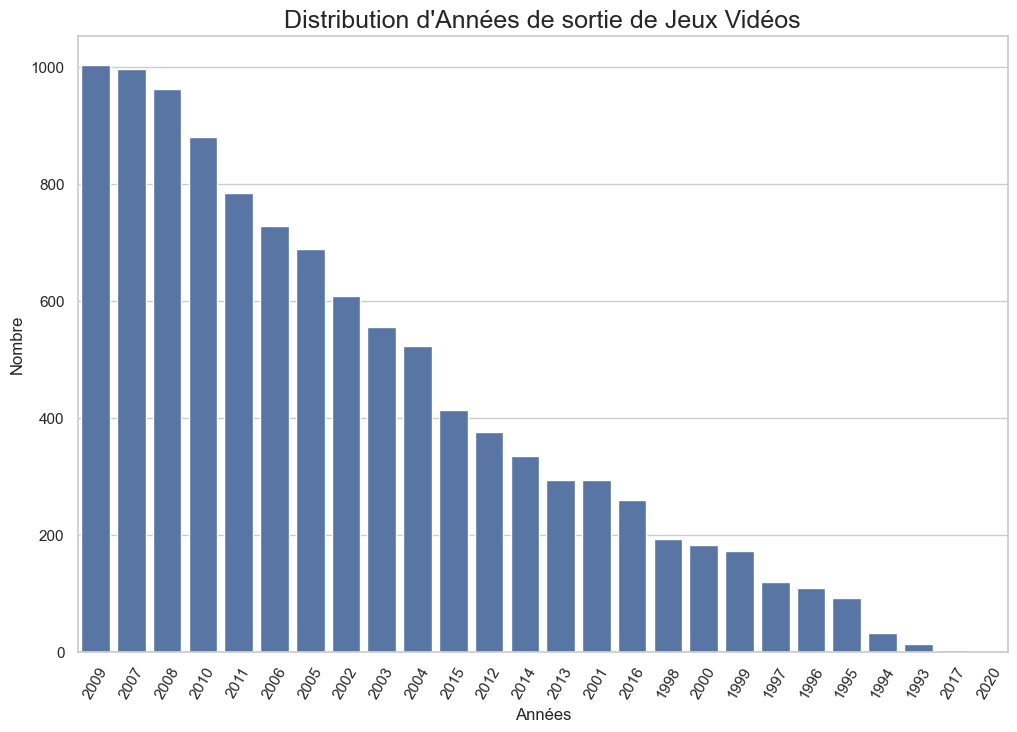

In [27]:
# Prendre l'ordre des années
year_order = X["Year"].value_counts().index

# Définir l'espace de travail
space_fig(12, 8)

# Appeller la fonction pour tracer les distributions des années
plot_bar(X, "Year", color=sns.color_palette()[0], order=year_order)

# Décrire le graphique
describe_graph("Distribution d'Années de sortie de Jeux Vidéos",
              "Années",
              "Nombre")
# Roter les valeur de l'axe X
plt.xticks(rotation=60);

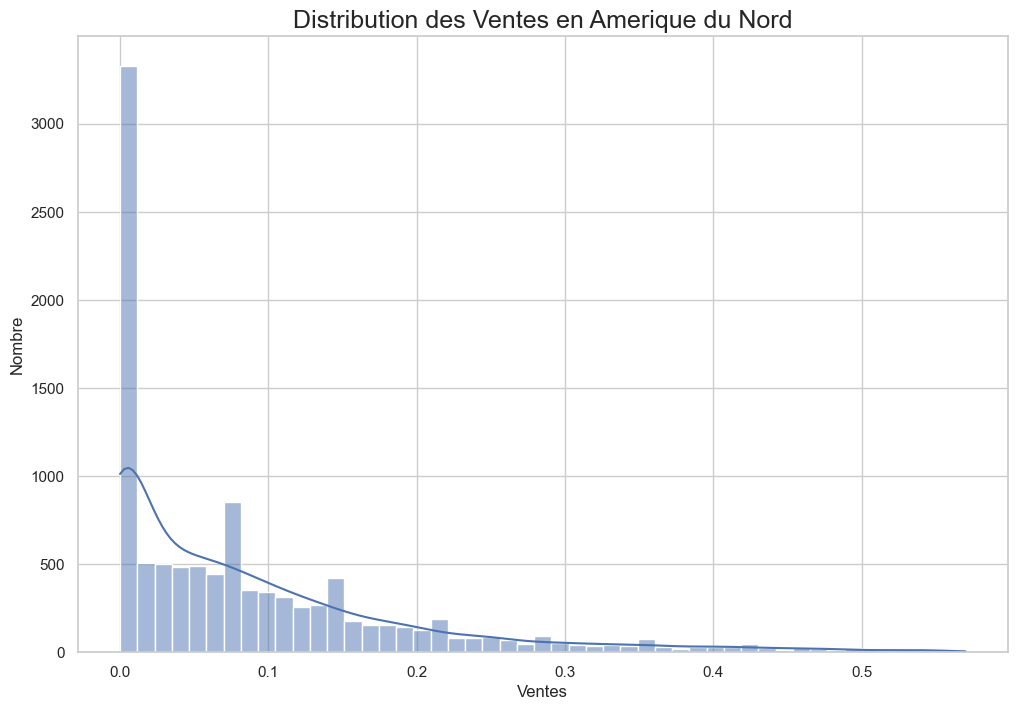

In [28]:
# Définir l'espace de travail
space_fig(12,8)

# Faire appel à la fonction qui trace les distributions
plot_distribution(X, "NA_Sales")

# Décrire le graphique
describe_graph("Distribution des Ventes en Amerique du Nord",
              "Ventes",
              "Nombre");

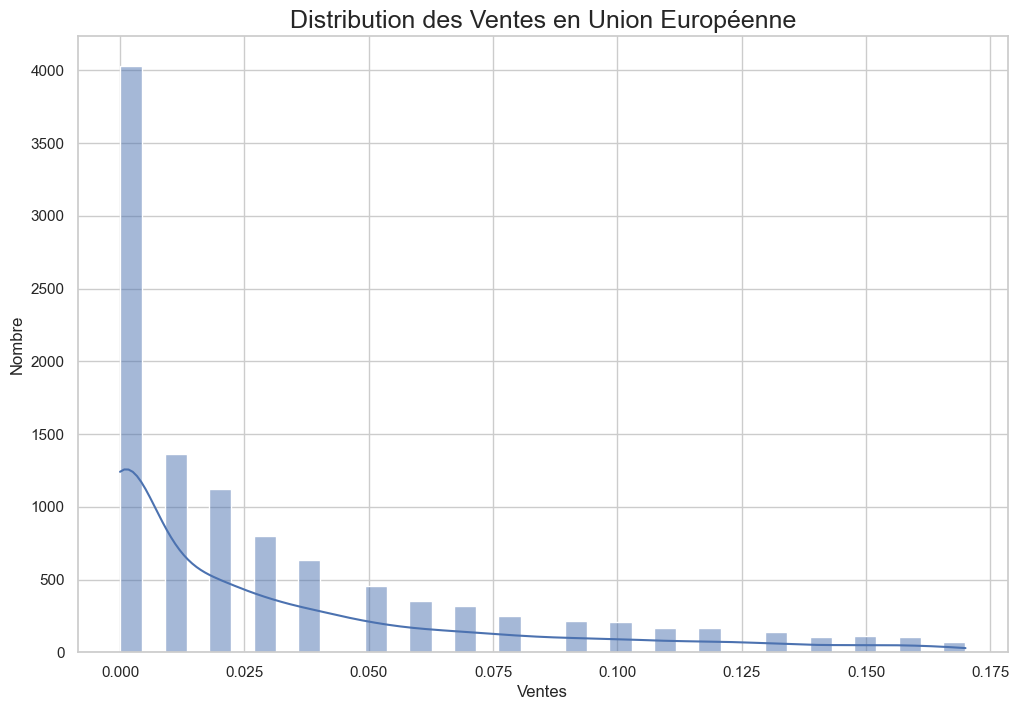

In [29]:
# Définir l'espace de travail
space_fig(12,8)

# Faire appel à la fonction qui trace les distributions
plot_distribution(X, "EU_Sales")

# Décrire le graphique
describe_graph("Distribution des Ventes en Union Européenne",
              "Ventes",
              "Nombre");

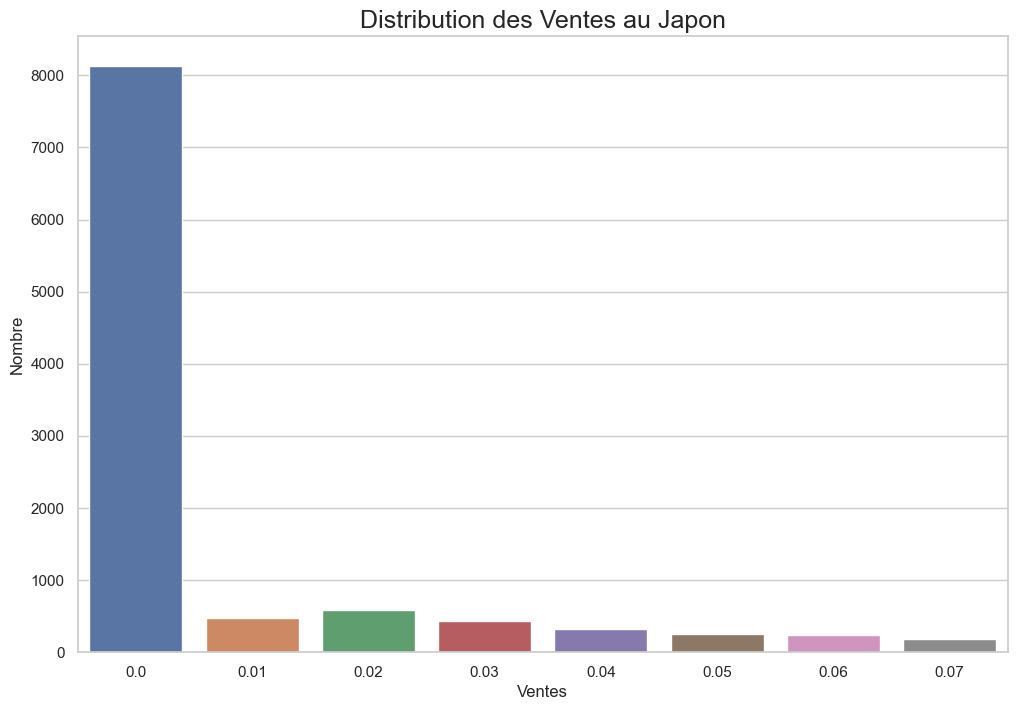

In [30]:
# Définir l'espace de travail
space_fig(12,8)

# Faire appel à la fonction qui trace les distributions
plot_bar(X, "JP_Sales")

# Décrire le graphique
describe_graph("Distribution des Ventes au Japon",
              "Ventes",
              "Nombre");

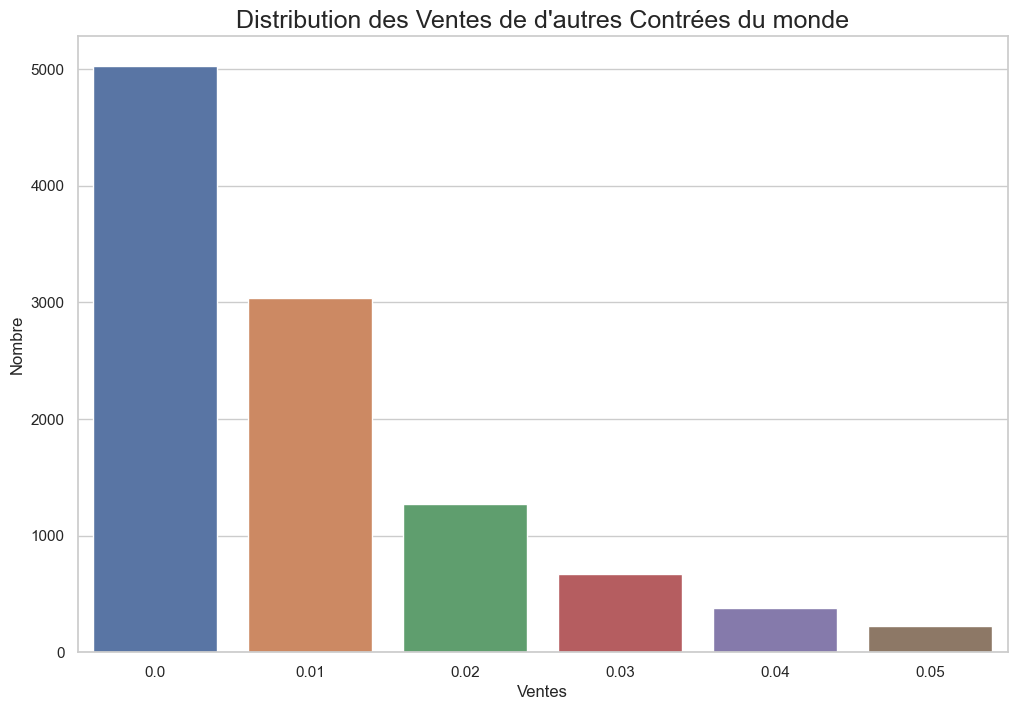

In [31]:
# Définir l'espace de travail
space_fig(12,8)

# Faire appel à la fonction qui trace les distributions
plot_bar(X, "Other_Sales")

# Décrire le graphique
describe_graph("Distribution des Ventes de d'autres Contrées du monde",
              "Ventes",
              "Nombre");

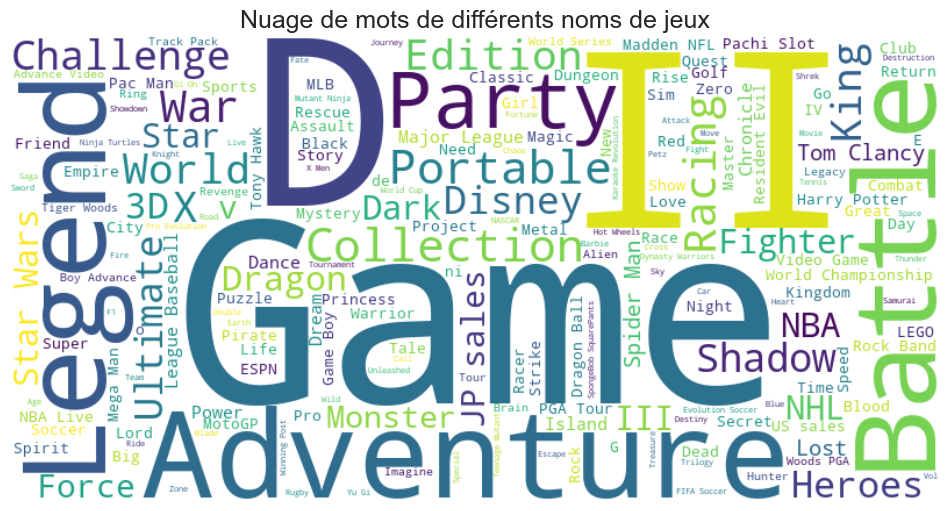

In [32]:
# Les noms de jeux vidéos
names = X.Name.values

# Convertir la liste des noms en une seule chaîne de caractères
texte = ' '.join(names)

# Créer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texte)

# Afficher le nuage de mots
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# Titrer le graphique
plt.title('Nuage de mots de différents noms de jeux', fontsize=18);

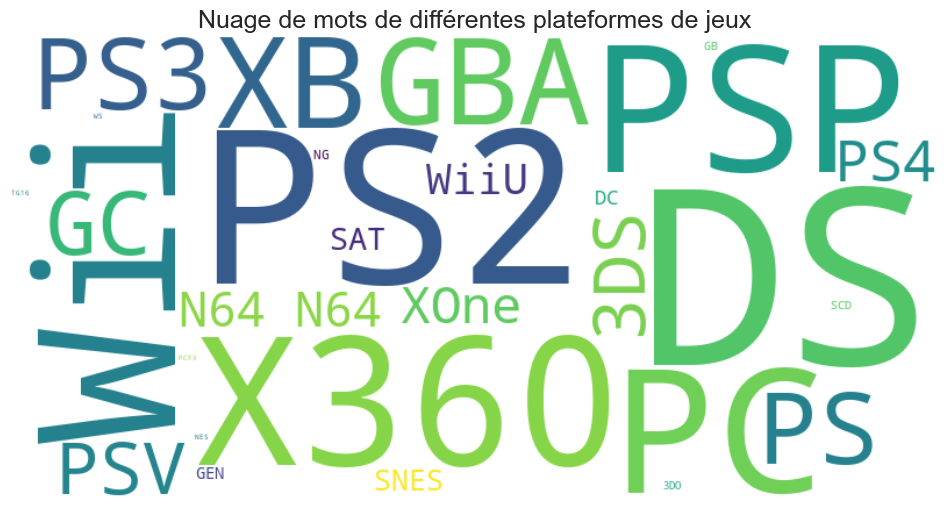

In [33]:
# Les données de genres de jeux vidéos
platforms = X.Platform.values

# Convertir la liste de plateformes en une seule chaîne de caractères
texte = ' '.join(platforms)

# Créer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texte)

# Afficher le nuage de mots
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# Titrer le graphique
plt.title('Nuage de mots de différentes plateformes de jeux', fontsize=18);

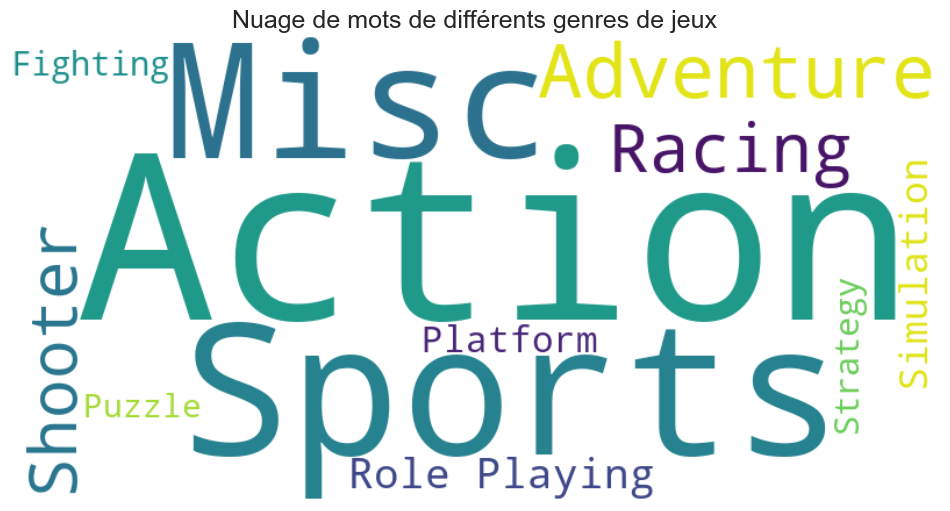

In [34]:
# Les données de genres de jeux vidéos
genre = X.Genre.values

# Convertir la liste de genre en une seule chaîne de caractères
texte = ' '.join(genre)

# Créer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texte)

# Afficher le nuage de mots
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# Titrer le graphique
plt.title('Nuage de mots de différents genres de jeux', fontsize=18);

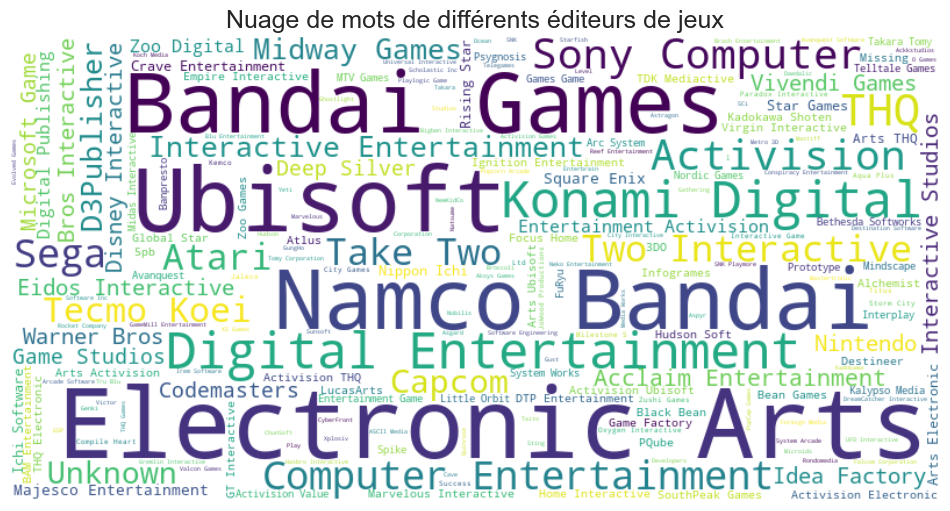

In [35]:
# Les données de genres de jeux vidéos
pub = X.Publisher.values

# Convertir la liste de genre en une seule chaîne de caractères
texte = ' '.join(pub)

# Créer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texte)

# Afficher le nuage de mots
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# Titrer le graphique
plt.title('Nuage de mots de différents éditeurs de jeux', fontsize=18);

## 📈 Analyse graphique

De l'analyse de ces variables qui mettent en évidence les relations entre les variables explicatives, on peut noter ce qui suit :
>- Les ventes en Amérique du Nord représentent pratiquement la moitié de ventes globales, suivi des ventes de l'Union Européenne ayant 27% des ventes totales et les ventes au Japon et d'autres contrées du monde prennent le pourcentage restant.
>- Il y a eu plusieurs sorties de jeux vidéos entre 2007 et 2010
>- `PS2`, `DS`, et `Wii` sont des plateformes ayant plus de Jeux vidéos.
>- Les jeux vidéos de genre `Action` dominent le plus suivi de genre `Sports`
>- `Electronic Arts`, `Games`, `Bandai` et `Namco` sont les éditeurs respectivement ayant édité le plus grand nombre de jeux vidéos.

<a id="a4"></a>
## 4.2 Analyse Bivariée

Il s'agit de visualiser graphiquement la relation entre deux variables, notamment la variable `explicative` qu'elle soit `numérique` ou `catégorielle` et la variable cible dite `target`.


<a id="num_target"></a>
## 4.2.1 Relation entre les variables Numériques et la variable Cible (*`target`*)

In [36]:
# Réafficher la matrice 
X.head()

Rank                              Name Platform  Year      Genre  \
2761  2763      The Walking Dead: Season One     X360  2012  Adventure   
2799  2801                   Mortal Kombat 4      N64  1998   Fighting   
2805  2807         Oddworld: Munch's Oddysee       XB  2001   Platform   
2813  2815             Full Spectrum Warrior       XB  2004   Strategy   
2823  2825  James Bond 007: Agent Under Fire       GC  2002    Shooter   

               Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  
2761  Avanquest Software      0.55      0.14       0.0         0.05  
2799      GT Interactive      0.55      0.17       0.0         0.01  
2805               Atari      0.54      0.16       0.0         0.03  
2813                 THQ      0.54      0.16       0.0         0.03  
2823     Electronic Arts      0.56      0.15       0.0         0.02

In [37]:
# Vérifier la taille de la matrice
X.shape

(10618, 10)

In [38]:
# Afficher le nombre de données du vecteur y
y.shape

(16598,)

In [39]:
vgsales_df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

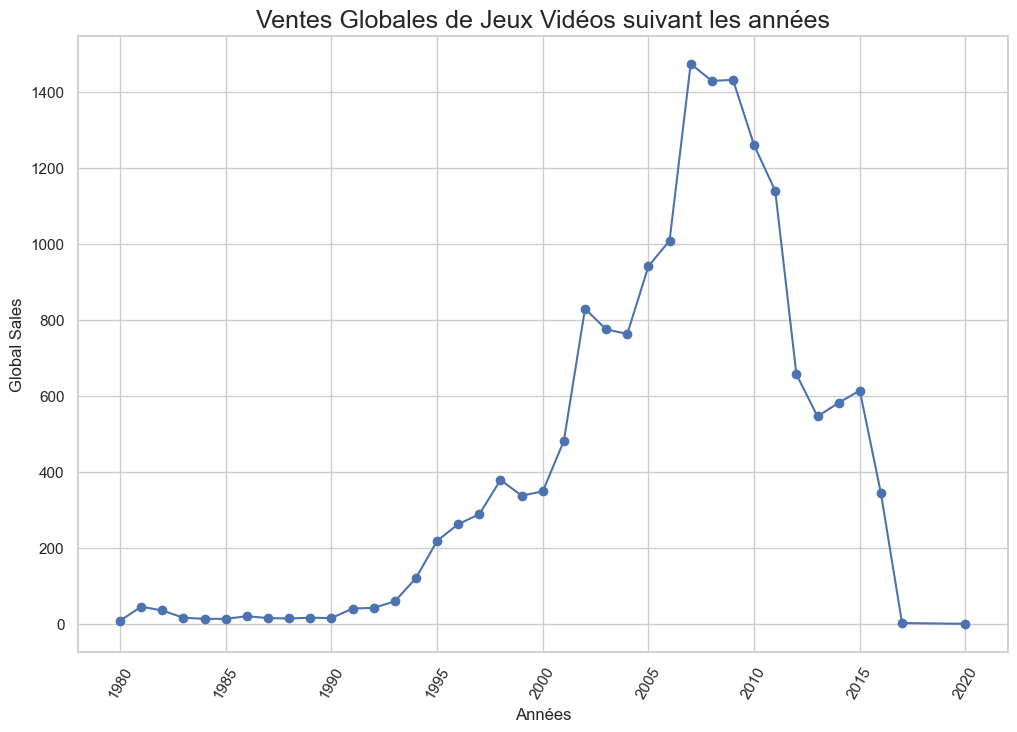

In [40]:
# Définir l'espace de travail
space_fig(12, 8)
# Tracer la courbe d'évolution des ventes globale suivant les années
plt.plot(vgsales_df.groupby("Year")["Global_Sales"].count(), marker="o")
# Décrirer le graphique
describe_graph("Ventes Globales de Jeux Vidéos suivant les années",
              "Années",
              "Global Sales")
plt.xticks(rotation=60)
plt.grid(True);

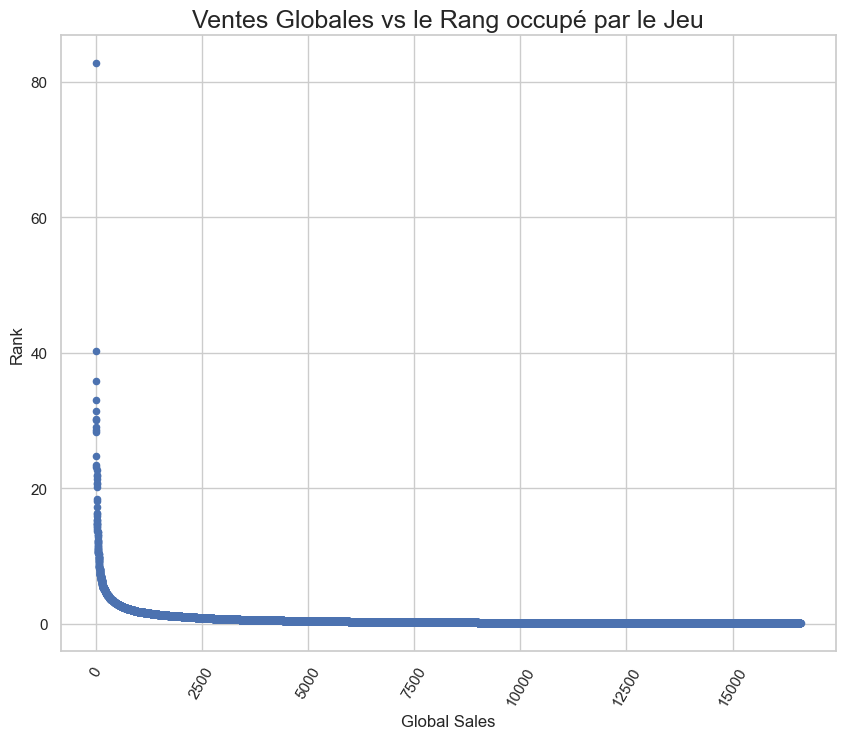

In [41]:
# Appel à la fonction de correlation
correlation(vgsales_df, "Rank", "Global_Sales")
# Décrire le graphique
describe_graph("Ventes Globales vs le Rang occupé par le Jeu",
              "Global Sales",
              "Rank")
plt.xticks(rotation=60)
plt.grid(True);

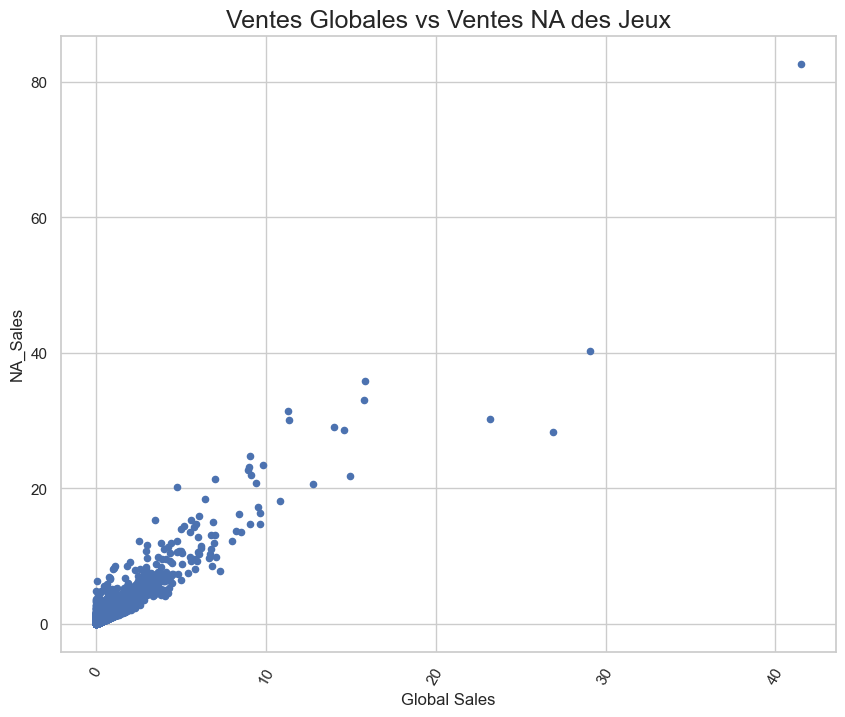

In [42]:
# Appel à la fonction de correlation
correlation(vgsales_df, "NA_Sales", "Global_Sales")
# Décrire le graphique
describe_graph("Ventes Globales vs Ventes NA des Jeux",
              "Global Sales",
              "NA_Sales")
plt.xticks(rotation=60)
plt.grid(True);

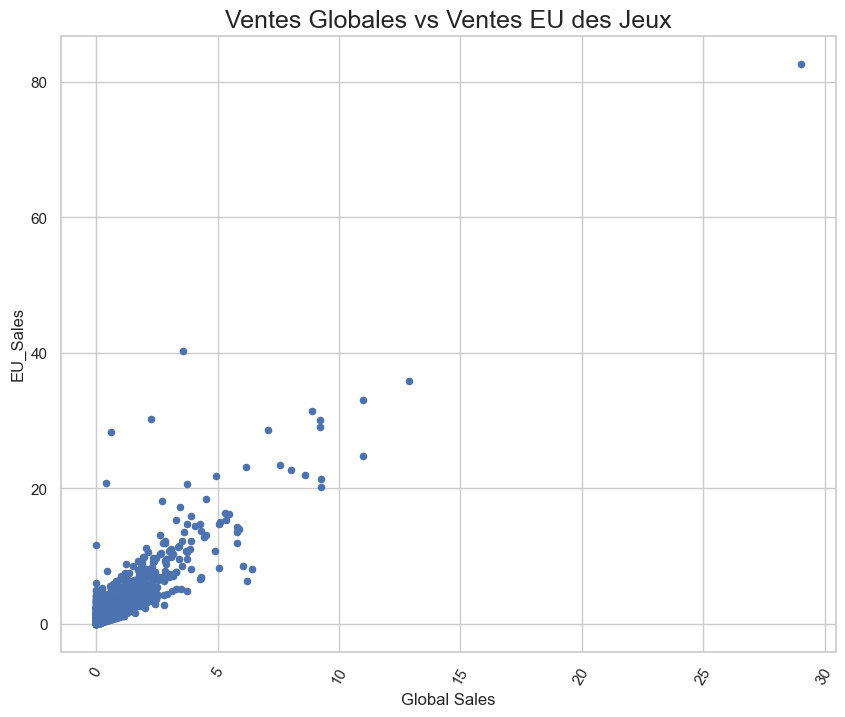

In [43]:
# Appel à la fonction de correlation
correlation(vgsales_df, "EU_Sales", "Global_Sales")
# Décrire le graphique
describe_graph("Ventes Globales vs Ventes EU des Jeux",
              "Global Sales",
              "EU_Sales")
plt.xticks(rotation=60)
plt.grid(True);

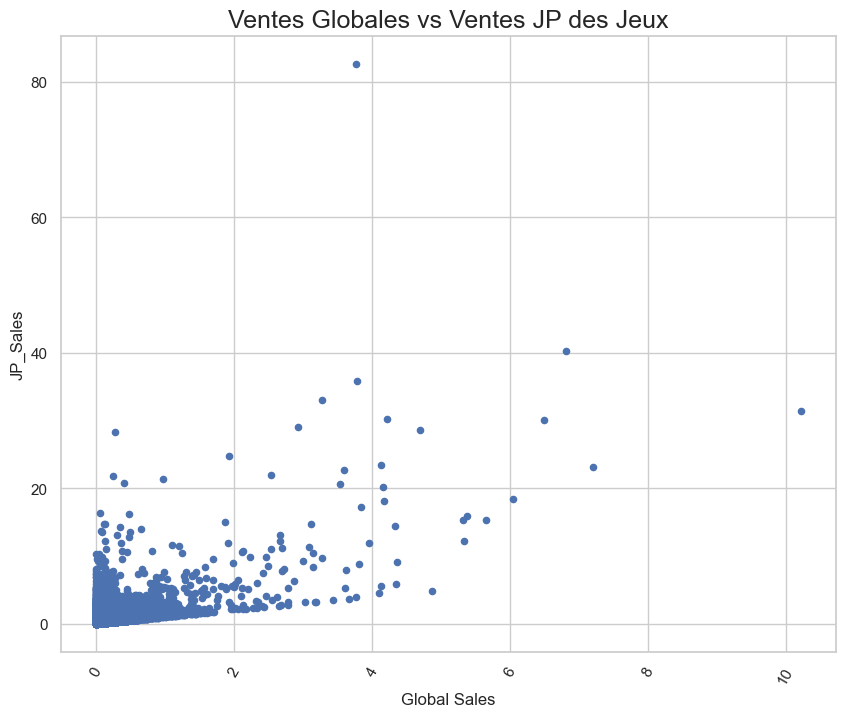

In [44]:
# Appel à la fonction de correlation
correlation(vgsales_df, "JP_Sales", "Global_Sales")
# Décrire le graphique
describe_graph("Ventes Globales vs Ventes JP des Jeux",
              "Global Sales",
              "JP_Sales")
plt.xticks(rotation=60)
plt.grid(True);

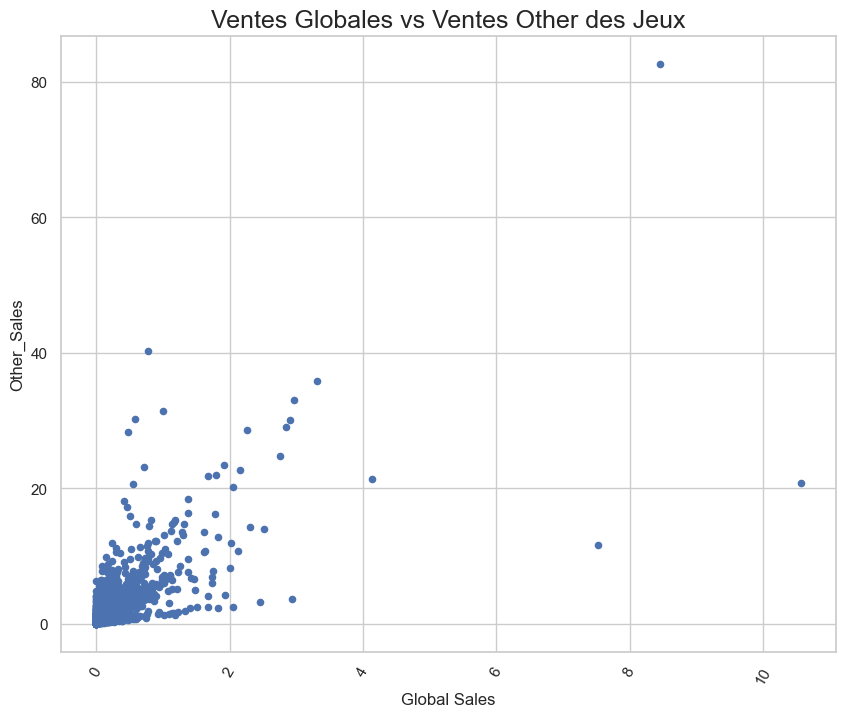

In [45]:
# Appel à la fonction de correlation
correlation(vgsales_df, "Other_Sales", "Global_Sales")
# Décrire le graphique
describe_graph("Ventes Globales vs Ventes Other des Jeux",
              "Global Sales",
              "Other_Sales")
plt.xticks(rotation=60)
plt.grid(True);

<a id="cat_target"></a>
## 4.2.2 Relation entre les variables Catégorielles et la variable Cible (*`target`*)

In [46]:
# Afficher de nouveau les 5 premières lignes de données
vgsales_df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

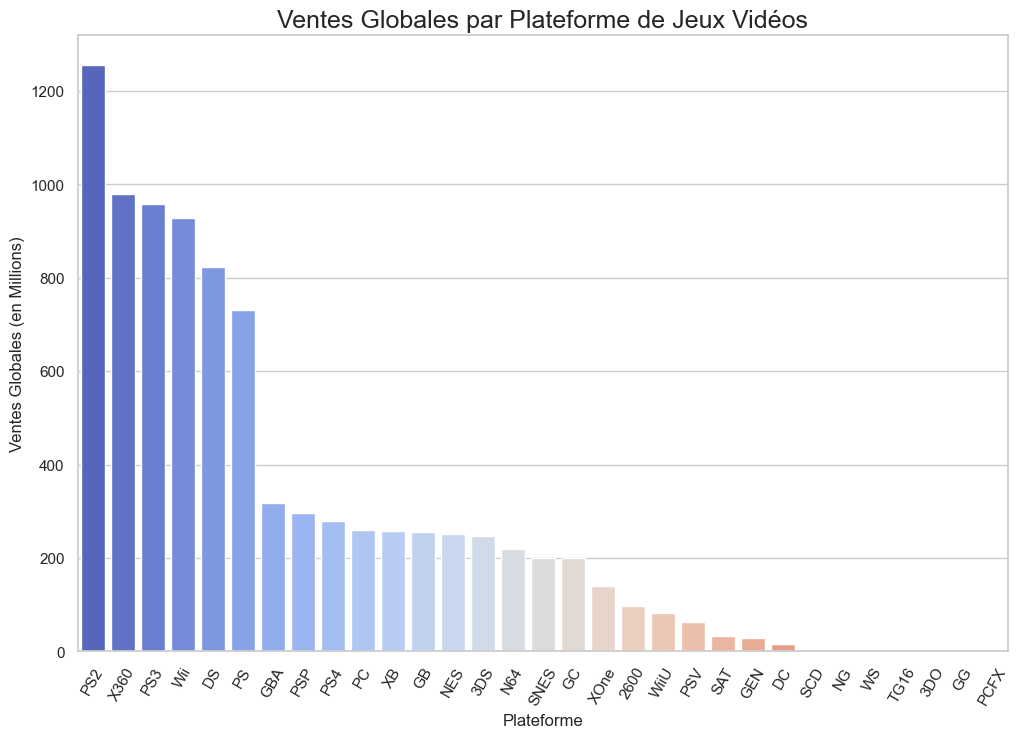

In [47]:
# Définir l'espace de travail
space_fig(12, 8)
# Grpuper les ventes globales suivant les plateforme
platform_sales = vgsales_df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
sns.barplot(x=platform_sales.index, y=platform_sales.values, palette="coolwarm")
# Décrire le graphique
describe_graph("Ventes Globales par Plateforme de Jeux Vidéos",
              "Plateforme",
              "Ventes Globales (en Millions)")
# Roter les données de l'axe x à 60°
plt.xticks(rotation=60);

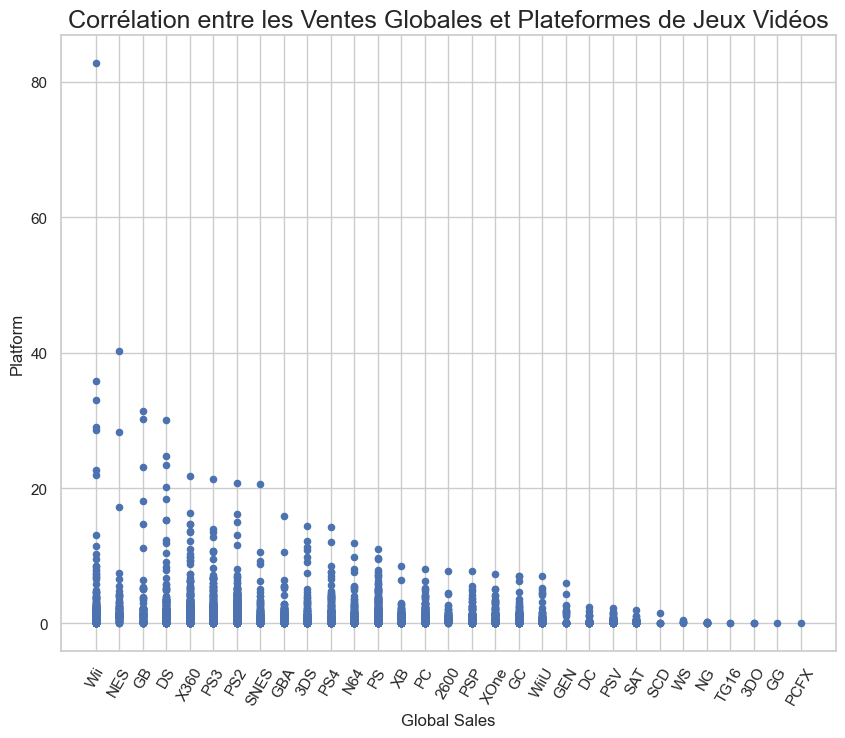

In [48]:
# Appel à la fonction de correlation
correlation(vgsales_df, "Platform", "Global_Sales")
# Décrire le graphique
describe_graph("Corrélation entre les Ventes Globales et Plateformes de Jeux Vidéos",
              "Global Sales",
              "Platform")
plt.xticks(rotation=60)
plt.grid(True);

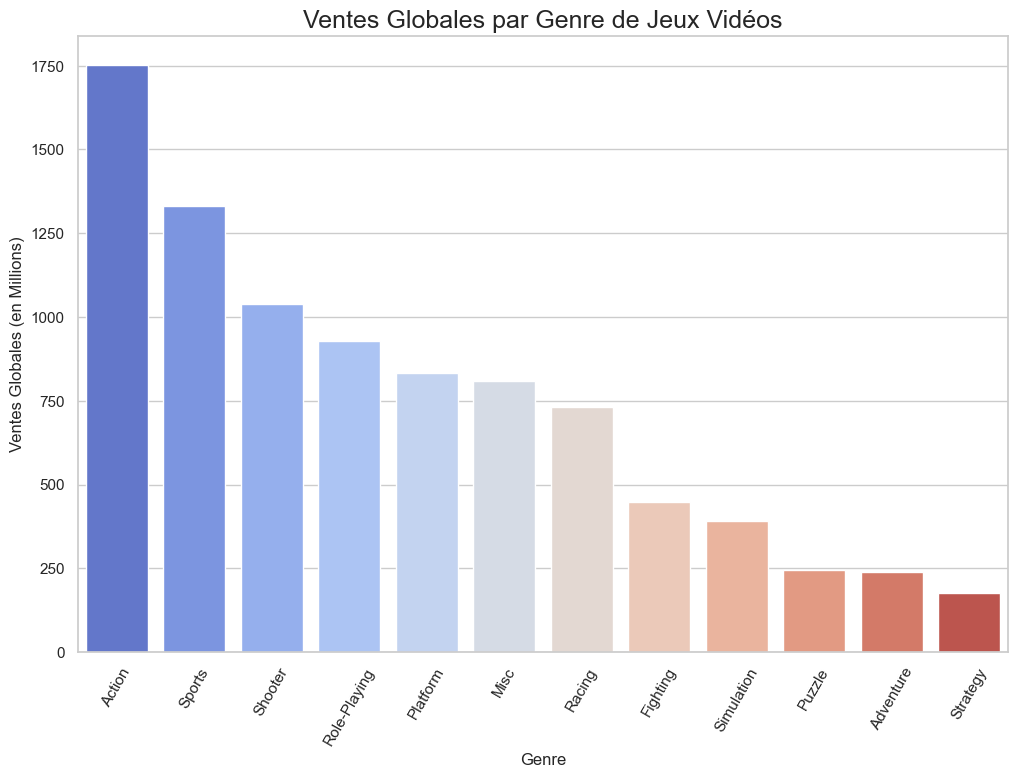

In [49]:
# Définir l'espace de travail
space_fig(12, 8)
# Grpuper les ventes globales suivant les plateforme
genres_sales = vgsales_df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
sns.barplot(x=genres_sales.index, y=genres_sales.values, palette="coolwarm") 
# Décrire le graphique
describe_graph("Ventes Globales par Genre de Jeux Vidéos",
              "Genre",
              "Ventes Globales (en Millions)")
# Roter les données de l'axe x à 60°
plt.xticks(rotation=60);

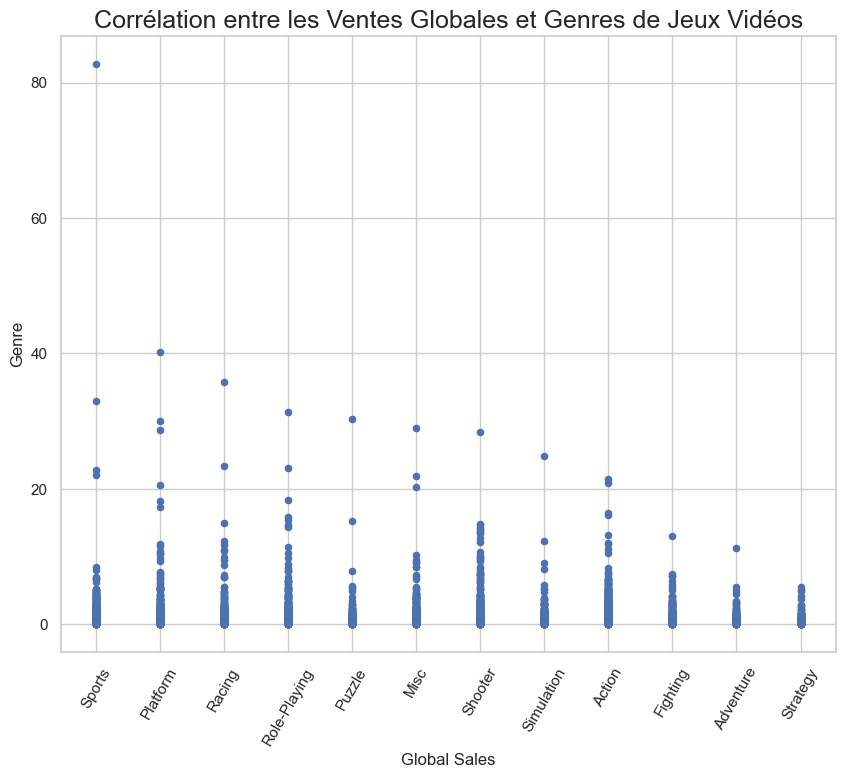

In [50]:
# Appel à la fonction de correlation
correlation(vgsales_df, "Genre", "Global_Sales")
# Décrire le graphique
describe_graph("Corrélation entre les Ventes Globales et Genres de Jeux Vidéos",
              "Global Sales",
              "Genre")
plt.xticks(rotation=60)
plt.grid(True);

## 📈 Analyse graphique

De l'analyse de ces représentations graphiques qui mette lumière les relations entre la target et les variables explicatives, nous pouvons dire ceci :
>- L'année `2007` a fait plus de ventes suivi des années `2009` et `2008`
>- Il y a une correlation positive entre les `Ventes Globales` et les ventes en `Amérique du Nord` et celles de `l'Union Européenne`.
>- `PS2` a fait plus de `1200` ventes sur les `Ventes Globales` de jeux vidéos.

<a id="features"></a>
## 4.2.3 Relation entre les variables explicatives

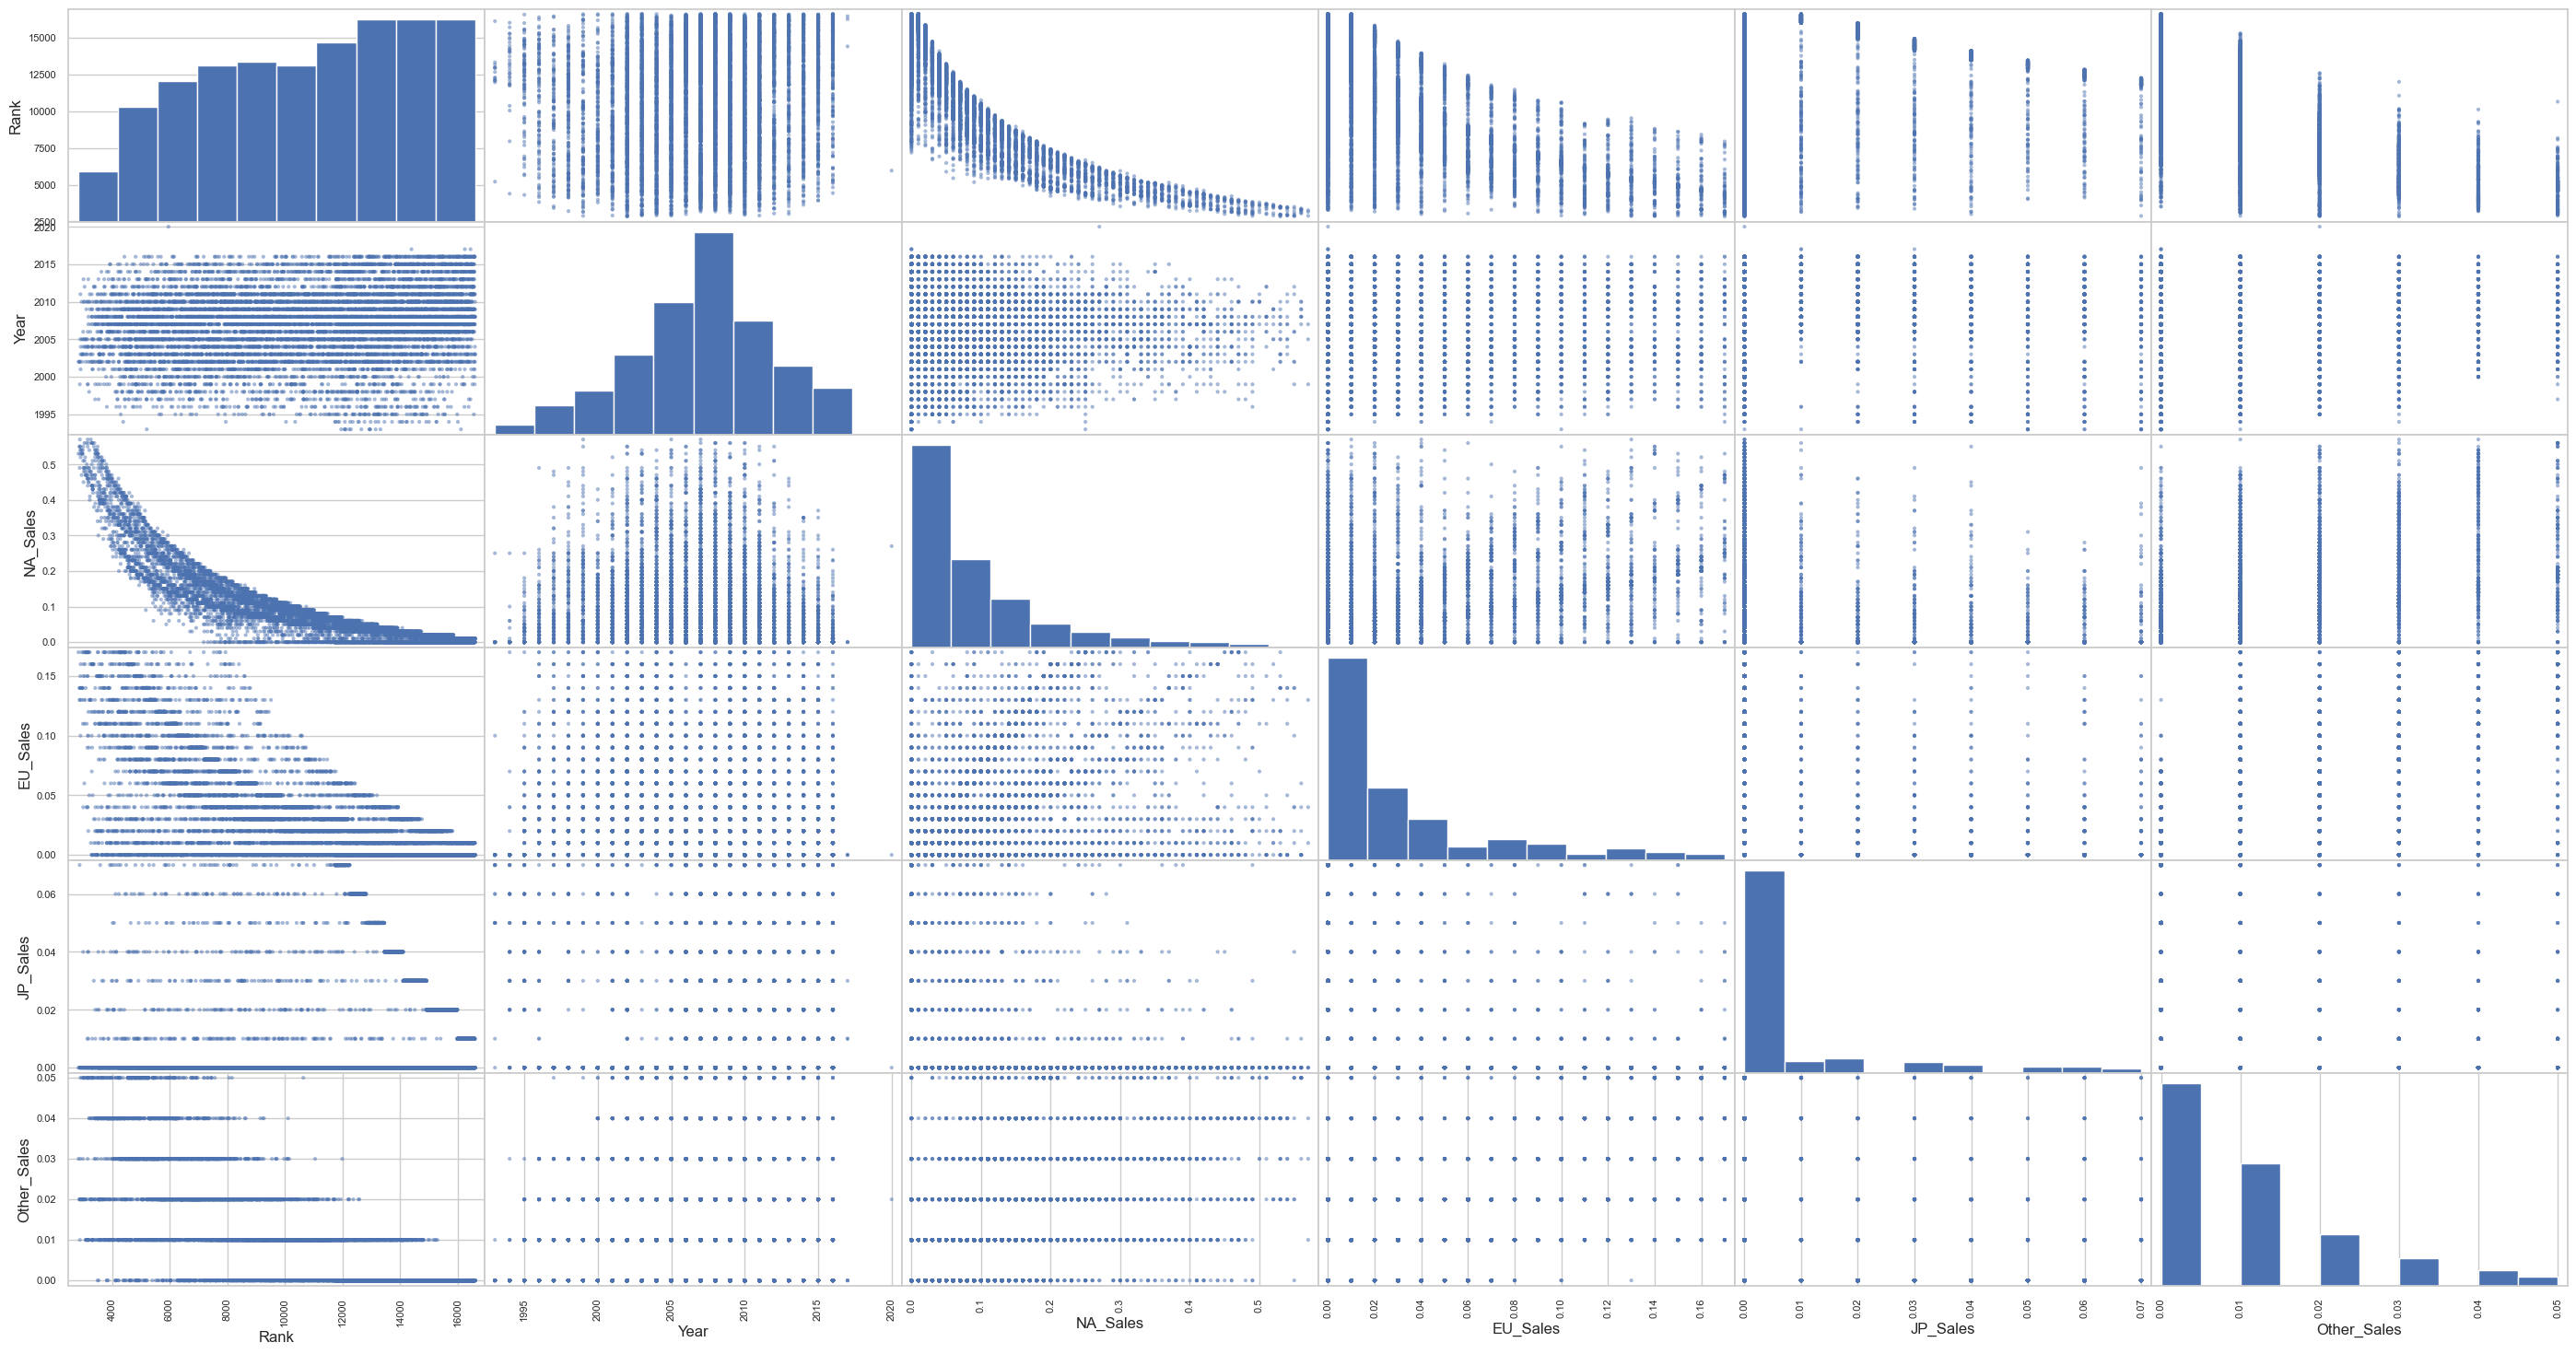

In [51]:
# Répartition et nuage de points des 4 dernières variables
pd.plotting.scatter_matrix(X[5:], figsize=(35, 18));

In [52]:
# Afficher de nouveau les données de la matrice 'X'
X.head()

Rank                              Name Platform  Year      Genre  \
2761  2763      The Walking Dead: Season One     X360  2012  Adventure   
2799  2801                   Mortal Kombat 4      N64  1998   Fighting   
2805  2807         Oddworld: Munch's Oddysee       XB  2001   Platform   
2813  2815             Full Spectrum Warrior       XB  2004   Strategy   
2823  2825  James Bond 007: Agent Under Fire       GC  2002    Shooter   

               Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  
2761  Avanquest Software      0.55      0.14       0.0         0.05  
2799      GT Interactive      0.55      0.17       0.0         0.01  
2805               Atari      0.54      0.16       0.0         0.03  
2813                 THQ      0.54      0.16       0.0         0.03  
2823     Electronic Arts      0.56      0.15       0.0         0.02

> *Il semble y avoir quelque chose d’intéréssant entre **`Rank`** et **`NA_Sales`** …Utilisons sns.jointplot pour voir cela plus en détails*

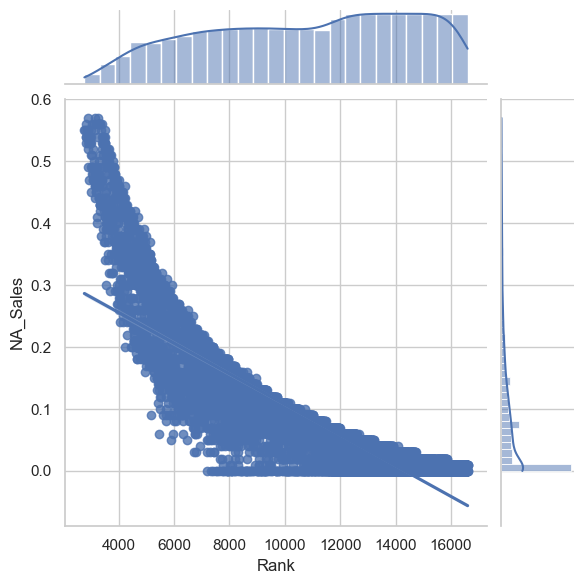

In [53]:
# Afficher la relation entre le rang et les ventes réalisées
sns.jointplot(data = X, x ="Rank", y = "NA_Sales", kind = "reg");

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



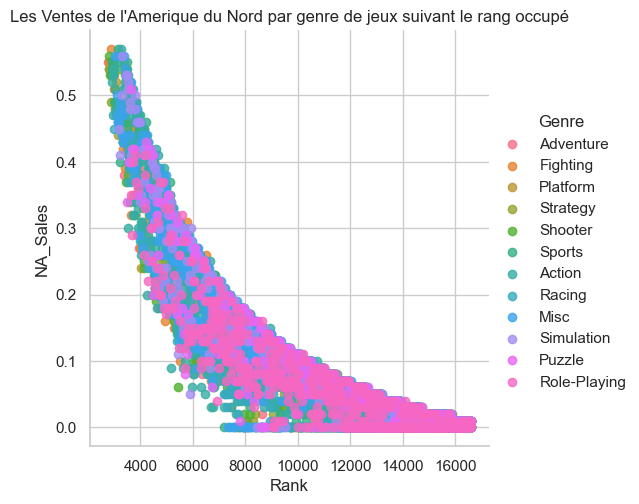

In [54]:
# Ajoter le genre de jeux sur le nuage de points
sns.lmplot(x = "Rank", y = "NA_Sales", data = X, hue = "Genre", fit_reg=False)
plt.title("Les Ventes de l'Amerique du Nord par genre de jeux suivant le rang occupé", fontsize=12);

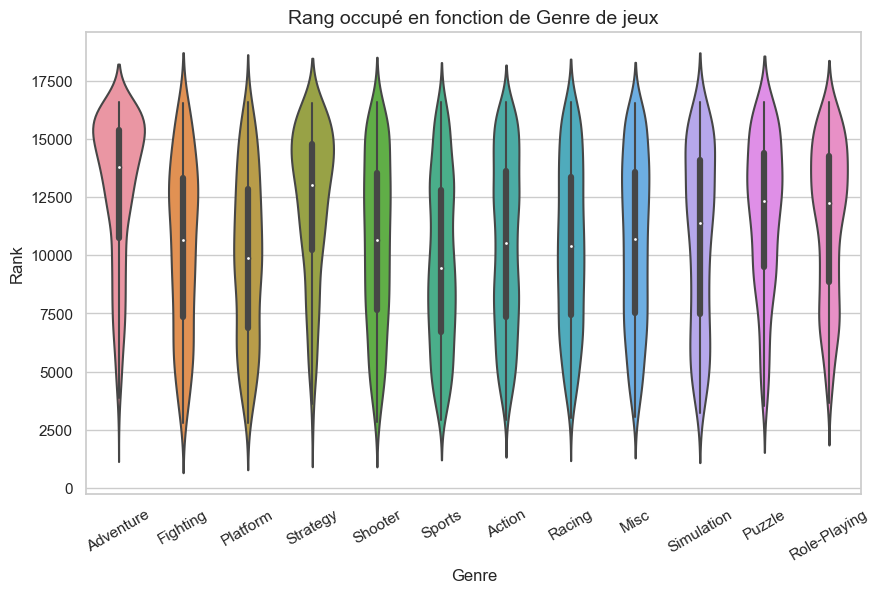

In [55]:
# Déssiner l'espace de travil
space_fig(10, 6)
# Prendre la couleur unique
color = sns.color_palette()[3]
sns.violinplot(x = "Genre", y = "Rank", data = X)
plt.title("Rang occupé en fonction de Genre de jeux", fontsize=14)
# Pivoter les étiquettes de l'axe x à 30°
plt.xticks(rotation = 30);

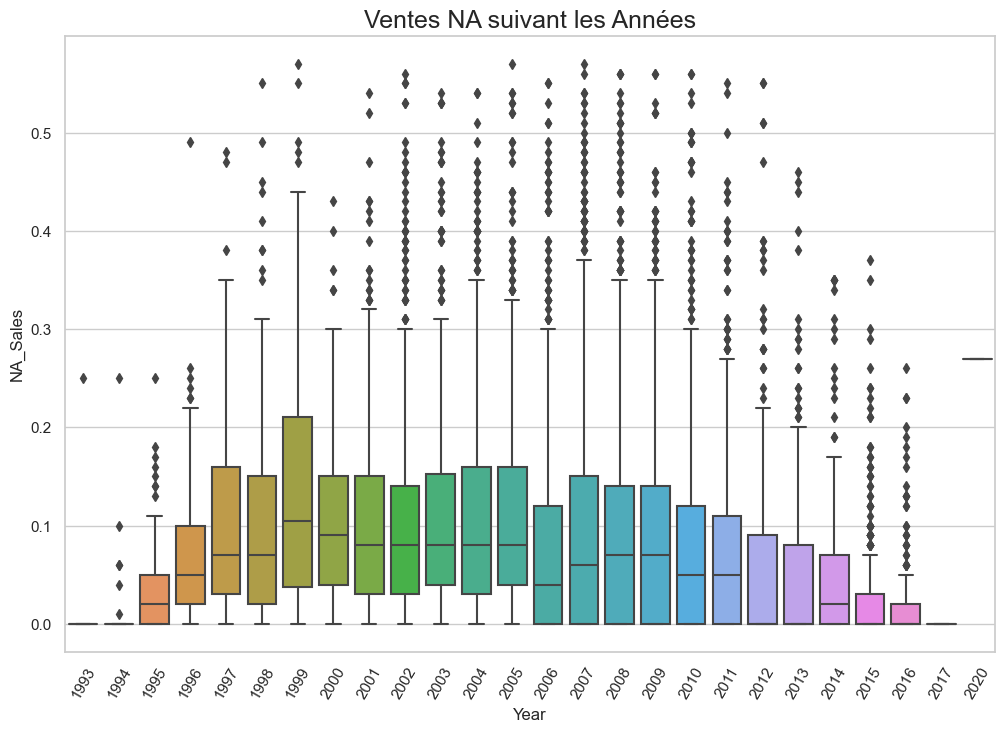

In [56]:
# Déssiner l'espace de travil
space_fig(12, 8)
# Prendre la couleur unique
color = sns.color_palette()[3]
sns.boxplot(x="Year", y="NA_Sales", data=X)
# Décrire le graphique
describe_graph("Ventes NA suivant les Années",
              "Year",
              "NA_Sales")
# Pivoter les étiquettes de l'axe x à 60°
plt.xticks(rotation=60);

<a id="end"></a>
## 5. Conclusions

>Pour finir, nous avons un grand ensemble de données dans lequel il n'y a pas de valeurs en double, cepedant, les valeurs manquantes y sont presentes occupant ***`1,98%`*** sur ***`100%`***, les valeurs manquantes que nous avons traiter en remplaçant par le mode pour le cas de variables catégorielles et par la médiane pour le cas des variables numériques.
L'identification des valeurs aberrantes (outliers) y était fait et il ressort qu'il y a en eu.
>
>L'analyse univariée et bivariée ont été riches en informations permettant d'identifier les relations entre les différentes variables et surtout de tirer des conclusions intéressantes.
>
>Tout compte fait, ces analyses sont d'une grande importance permettant ainsi de bien aborder la prochaine étape qui est celle de la ***`modélisation`*** en effet, elles nous ont donné des informations precieuses.